## algorithm design and anlysis-2025 spring  homework 4
**Deadline**：2025.5.14

**name**: 闫越越 112024321341996


note：
---
1. 带有\*的题目，申请免上课的同学，必须完成，其他同学选作；
2. 请独立完成，如求助了他人或者大模型，请著明，并且不可省略算法分析部分；
4. 如若作答有雷同，全部取消成绩；
3. 需要书面作答的题目，可以通过引用图片的形式添加，但是注意上传项目时包含所引用的图片的源文件；
4. $log_n$ 默认表示$log_2{n}$;

## 问题 1 
**最小生成树（Minimum Spanning Tree）**

设  **G**  为一个带权重的连通无向图，且所有边的权重均不相等。令$e_i$ 为权重第 $i$ 小的边。最小生成树（MST）是否必须包含 $e_1$ ? 同理，是否必须包含 $e_2$ 和 $e_3$ ? 若必须包含，请给出证明；否则，请构造反例。需从基本原理论证，不能依赖割引理(cut lemma) 或 Prim/Kruskal算法的正确性。


answer: 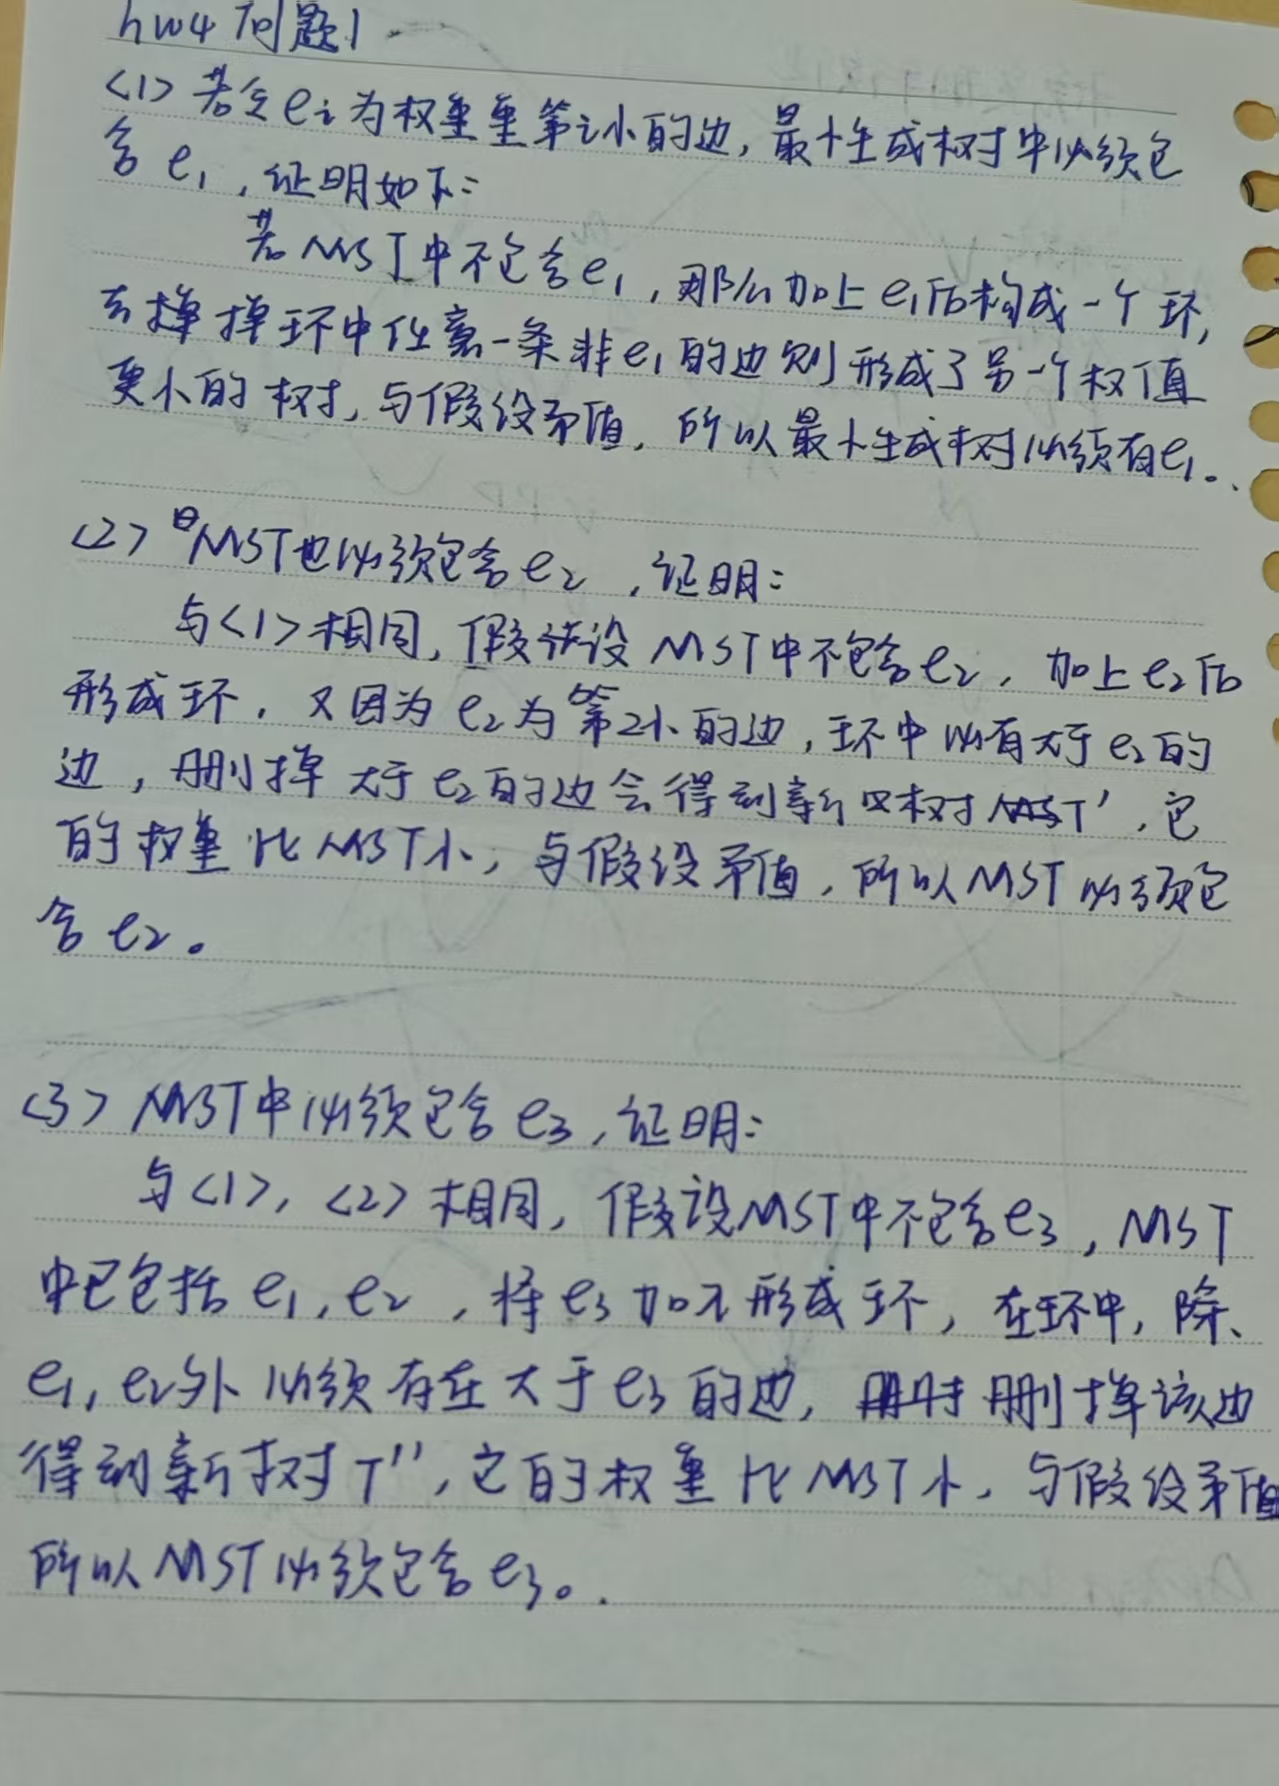

## 问题 2 
**瓶颈生成树（Bottleneck Spanning Tree）**

带有权重的无向图 $G(V,E,w)$ 的瓶颈生成树，表现为：在所有生成树中，最大权重边的权重值最小。即，BST $T$ 最小化瓶颈损失 $c(T)=max_{e \in T}{w(e)}$。

1. 证明 $G$ 的每一个最小生成树（MST）都是瓶颈生成树（BST）
2. 设计一个线性时间复杂度的算法：， 对于一个图 $G(V,E,w)$ 和一个整数 $b$，判断图 $ G$ 是否存在一个瓶颈生成树，其最大权重边的权重不超过 $b$，分析算法设计思路，并基于python编程实现。
3. 设计一个线性时间复杂度的算法：对于给定的图 $G(V,E,w)$，找到其瓶颈生成树，分析算法设计思路，并基于python编程实现。

#### 第一问证明:

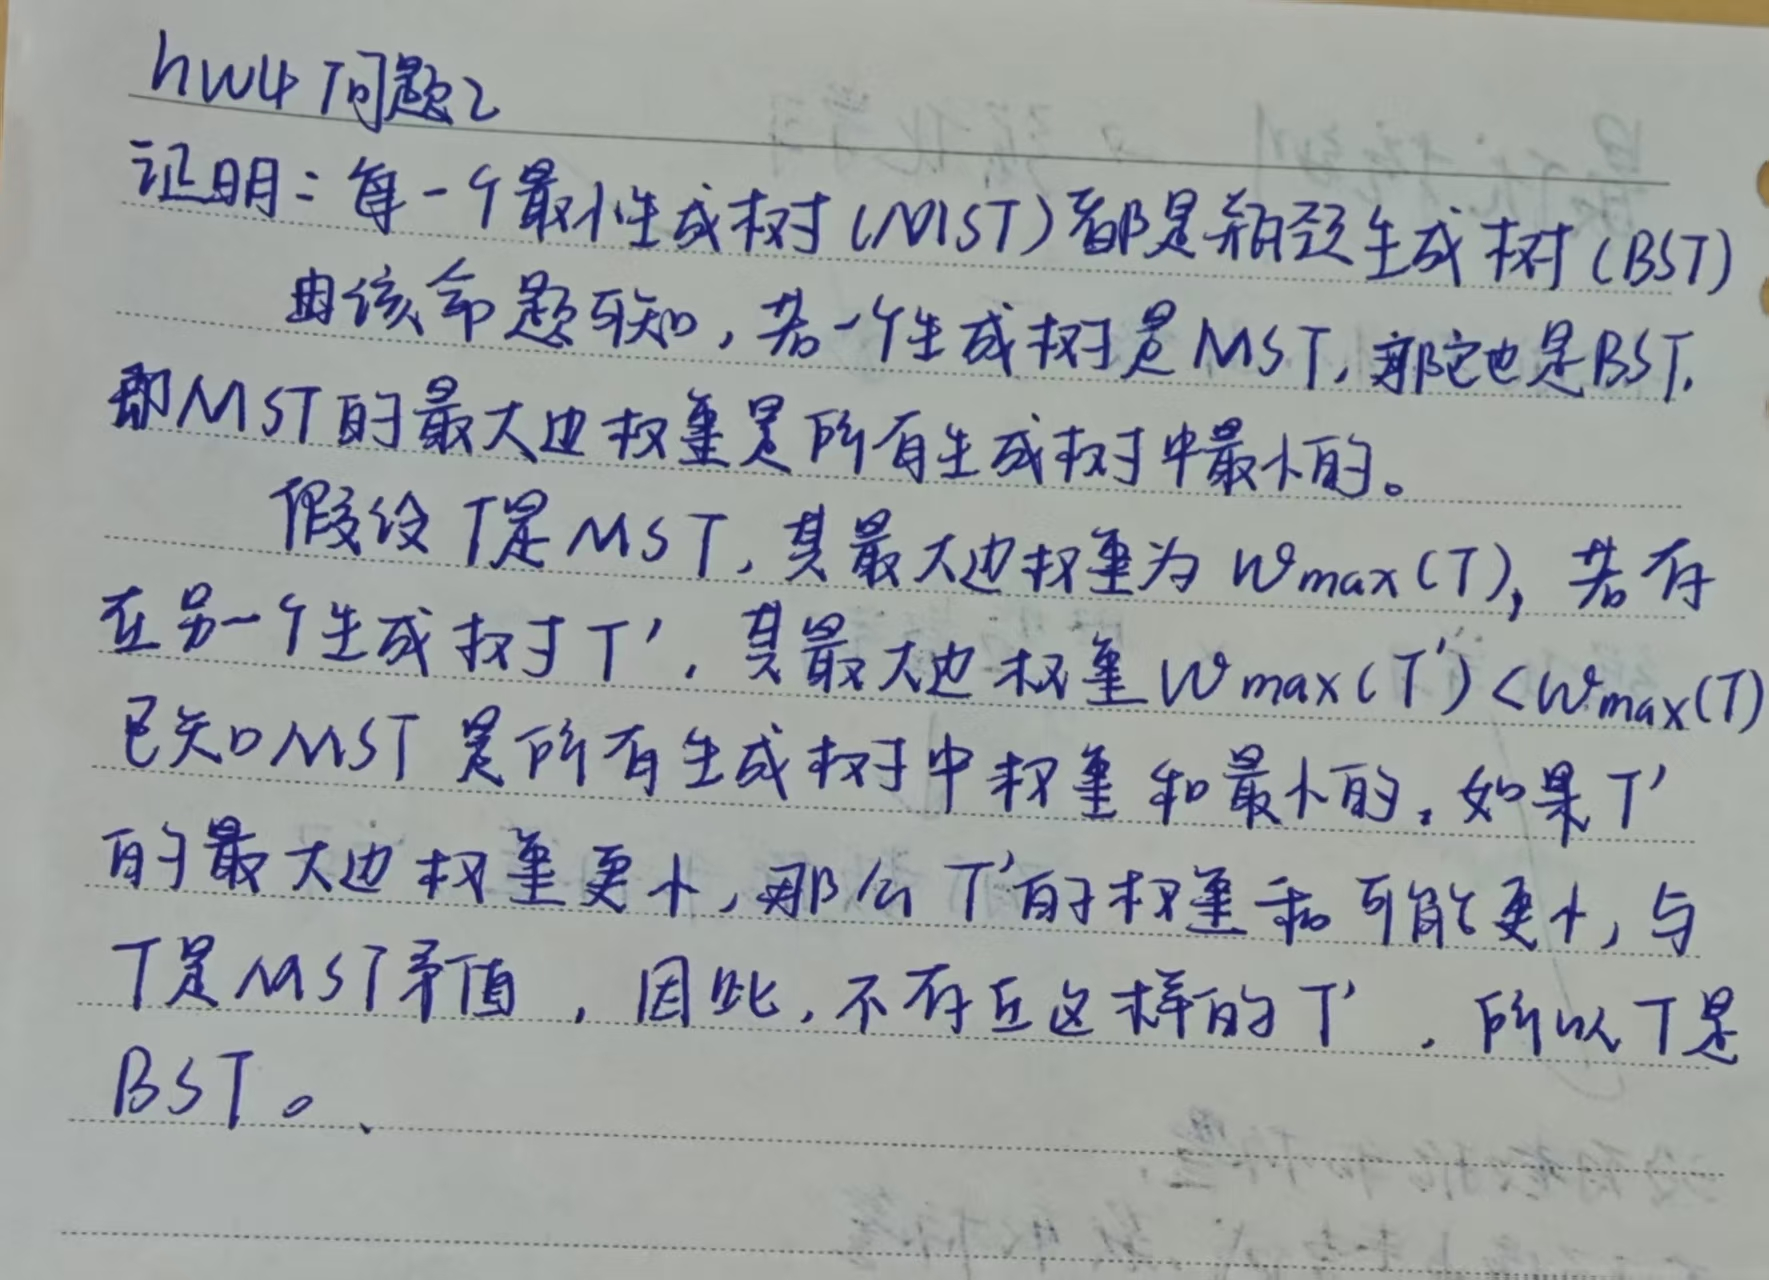



#### 2.  idea：

   若G存在BST最大权重便的权重不超过b，那么若在原图中仅保留权重不超过b的边后，图仍然连通。证明原命题等于证明原图中仅保留权重不超过b的边后，图是否连通。

   先遍历所有边，筛选出权重不超过b的边，构成子图G',然后检查G'是否连通。使用BFS或DFS从任意顶点出发，遍历所有可达顶点。如果遍历到的顶点数等于|V|则G‘连通；否则不连通。如果G'连通，则存在满足条件的BST；否则不存在。
   总时间复杂度：O(∣V∣+∣E∣)
  
##### coda：

In [4]:
from collections import deque

def has_bst_with_max_weight(G, b):
    V, E = G['vertices'], G['edges']
    # 权重 <= b
    filtered_edges = [e for e in E if e[2] <= b]
    # 建立邻接表
    adj = {v: [] for v in V}
    for u, v, w in filtered_edges:
        adj[u].append(v)
        adj[v].append(u)
    # 是否连通
    if not V:
        return True
    visited = set()
    queue = deque([V[0]])
    while queue:
        node = queue.popleft()
        if node not in visited:
            visited.add(node)
            for neighbor in adj[node]:
                if neighbor not in visited:
                    queue.append(neighbor)
    return len(visited) == len(V)

#### 3.  idea：
使用并查集数据结构，首先对图的边按权重从小到大排序。然后遍历排序后的边，不断合并端点所在集合，直到所有顶点都在同一个集合中，此时最后加入的那条边的权重就是瓶颈生成树的瓶颈权重。在合并过程中记录加入的边，最终这些边构成瓶颈生成树。

##### coda：

In [5]:
class UnionFind:
    def __init__(self, n):
        self.parent = list(range(n))
        self.rank = [0] * n

    def find(self, x):
        if self.parent[x] != x:
            self.parent[x] = self.find(self.parent[x])
        return self.parent[x]

    def union(self, x, y):
        root_x = self.find(x)
        root_y = self.find(y)
        if root_x != root_y:
            if self.rank[root_x] > self.rank[root_y]:
                self.parent[root_y] = root_x
            elif self.rank[root_x] < self.rank[root_y]:
                self.parent[root_x] = root_y
            else:
                self.parent[root_y] = root_x
                self.rank[root_x] += 1


def find_bst(graph):
    uf = UnionFind(len(graph))
    edges = []
    for i in range(len(graph)):
        for j, w in enumerate(graph[i]):
            if w != 0:
                edges.append((i, j, w))
    edges.sort(key=lambda x: x[2])
    bst_edges = []
    for u, v, w in edges:
        if uf.find(u) != uf.find(v):
            uf.union(u, v)
            bst_edges.append((u, v, w))
            if len(bst_edges) == len(graph) - 1:
                break
    return bst_edges

## 问题 3

**道路网（Road Network）**

假设有一个以图 $ G(V, E, l) $ 表示的道路网络，连接了一组城市 $ V $。我们假设该网络是有向的，并且每条道路 $(u, v) \in E$ 都有一个非负的长度 $ l(u, v) $。一条新的道路即将被建造，因此有一个列表 $ E' $ 包含它可以连接的城市对。每对 $(u, v) \in E'$ 都有一个对应的长度 $ l'(u, v) $。我们希望选择一对城市，使得两个城市 $ s, t \in V $ 之间的距离减少最大。请为此问题编写一个高效的算法，并详细解释算法的正确性和复杂度。


#### 算法思路

1.使用Dijkstra算法计算原始图中s到所有其他城市的最短距离d(s,⋅)。反转图后计算原始图中所有城市到t的最短距离d(⋅,t)。

2.对于每条候选道路(u,v)∈E'，计算添加后s到t的可能新距离：d'(s,t)=min(d(s,t),d(s,u)+l'(u,v)+d(v,t))。距离减少量为：reduction=d(s,t)-d'(s,t)
遍历所有候选道路，找到使reduction 最大的那条。

3.初始化最大减少量max_reduction=0和最优候选best_edge=None。对于每条候选道路(u,v)∈E',计算新距离：new_dist=d(s,u)+l'(u,v)+d(v,t)；计算减少量：
reduction=d(s,t)-min(d(s,t)-min(d(s,t),new_dist)。

4.如果reduction>max_reduction，更新max_reduction和best_edge。最后返回best_edge和max_reduction。

#### 正确性

d(s,⋅)是正确的s到所有城市的最短距离，d(⋅,t)是正确的所有城市到t的最短距离。添加候选道路(u,v)后，s到t的新路径可能是原始最短路径，也可能是通过(u,v)的新路径s→u→v→t。因此，新距离是两者的最小值。且该算法遍历所有候选道路，确保找到减少量最大的那条。

#### 时间复杂度

计算d(s,⋅)：O(|E|+|V|log|V|)（Dijkstra 算法）
计算d(⋅,t)：O(|E|+|V|log|V|)（反转图后 Dijkstra）
遍历候选道路E'：O(|E '|)
总时间复杂度:O(|E|+|V|log|V|+|E'|)

In [3]:
import heapq

def add_best_road(G, E_prime, s, t):
    V, E = G['vertices'], G['edges']   
    # 建立原图邻接表
    adj = {v: [] for v in V}
    for u, v, l in E:
        adj[u].append((v, l))
    
    # 计算d(s, ·) 
    d_s = {v: float('inf') for v in V}
    d_s[s] = 0
    heap = [(0, s)]
    while heap:
        dist_u, u = heapq.heappop(heap)
        if dist_u > d_s[u]:
            continue
        for v, l in adj[u]:
            if d_s[v] > d_s[u] + l:
                d_s[v] = d_s[u] + l
                heapq.heappush(heap, (d_s[v], v))
    
    # 建立反转图
    adj_rev = {v: [] for v in V}
    for u, v, l in E:
        adj_rev[v].append((u, l))
    
    # 计算d(·, t) 
    d_t = {v: float('inf') for v in V}
    d_t[t] = 0
    heap = [(0, t)]
    while heap:
        dist_v, v = heapq.heappop(heap)
        if dist_v > d_t[v]:
            continue
        for u, l in adj_rev[v]:
            if d_t[u] > d_t[v] + l:
                d_t[u] = d_t[v] + l
                heapq.heappush(heap, (d_t[u], u))
    
    original_dist = d_s[t]
    max_reduction = 0
    best_edge = None
   #更新最大减少量max_reduction和最有候选best_edge
    for u, v, l_prime in E_prime:
        new_dist = d_s[u] + l_prime + d_t[v]
        reduction = original_dist - min(original_dist, new_dist)
        if reduction > max_reduction:
            max_reduction = reduction
            best_edge = (u, v, l_prime)
    
    return best_edge, max_reduction


## 问题 4

**逃离问题**

一个 $ n \times n $ 的网格是一个无向图，由 $ n $ 行和 $ n $ 列的顶点组成，如下图所示。我们用 $(i,j)$ 表示第 $ i $ 行和第 $ j $ 列的顶点。除了边界顶点，网格中的所有顶点都有四个邻居，即满足 $ i = 1, i = n, j = 1 $ 或 $ j = n $ 的点 $(i,j)$。

给定网格中的 $ m \leq n^2 $ 个起点 $(x_1, y_1), (x_2, y_2), \cdots , (x_m, y_m)$，逃离问题是确定是否存在 $ m $ 条顶点不相交的路径（即路径之间不相交），从这些起点到边界上的任意 $ m $ 个不同点。例如，图1中的网格存在逃离。

(1) 该问题可以看作是一个最大流问题。考虑一个流网络，其中顶点和边都有容量。也就是说，进入任何给定顶点的总正流量受到容量限制。证明在具有边和顶点容量的网络中确定最大流可以简化为在具有可比大小的普通流网络上的最大流问题。更准确地说，你需要将一个具有顶点和边容量的网络 $ G = (V,E) $ 转换为另一个仅具有边容量的网络 $ G' = (V', E') $，使得两个网络上的最大流相同，并且你构建的新网络具有 $ V' = O(V) $ 个顶点和 $ E' = O(E) $ 条边。你可以假设网络是连通的。

(2) 描述一个解决逃离问题的高效算法，并分析其运行时间。


<div align="center"> <img alt="图片" src="./fig/escepe-p.png"> </div>
<center> 图2. 逃脱问题网格，起始顶点为黑色，其他网格顶点为白色</center>

##### idea：算法设计思路参考deepseek模型
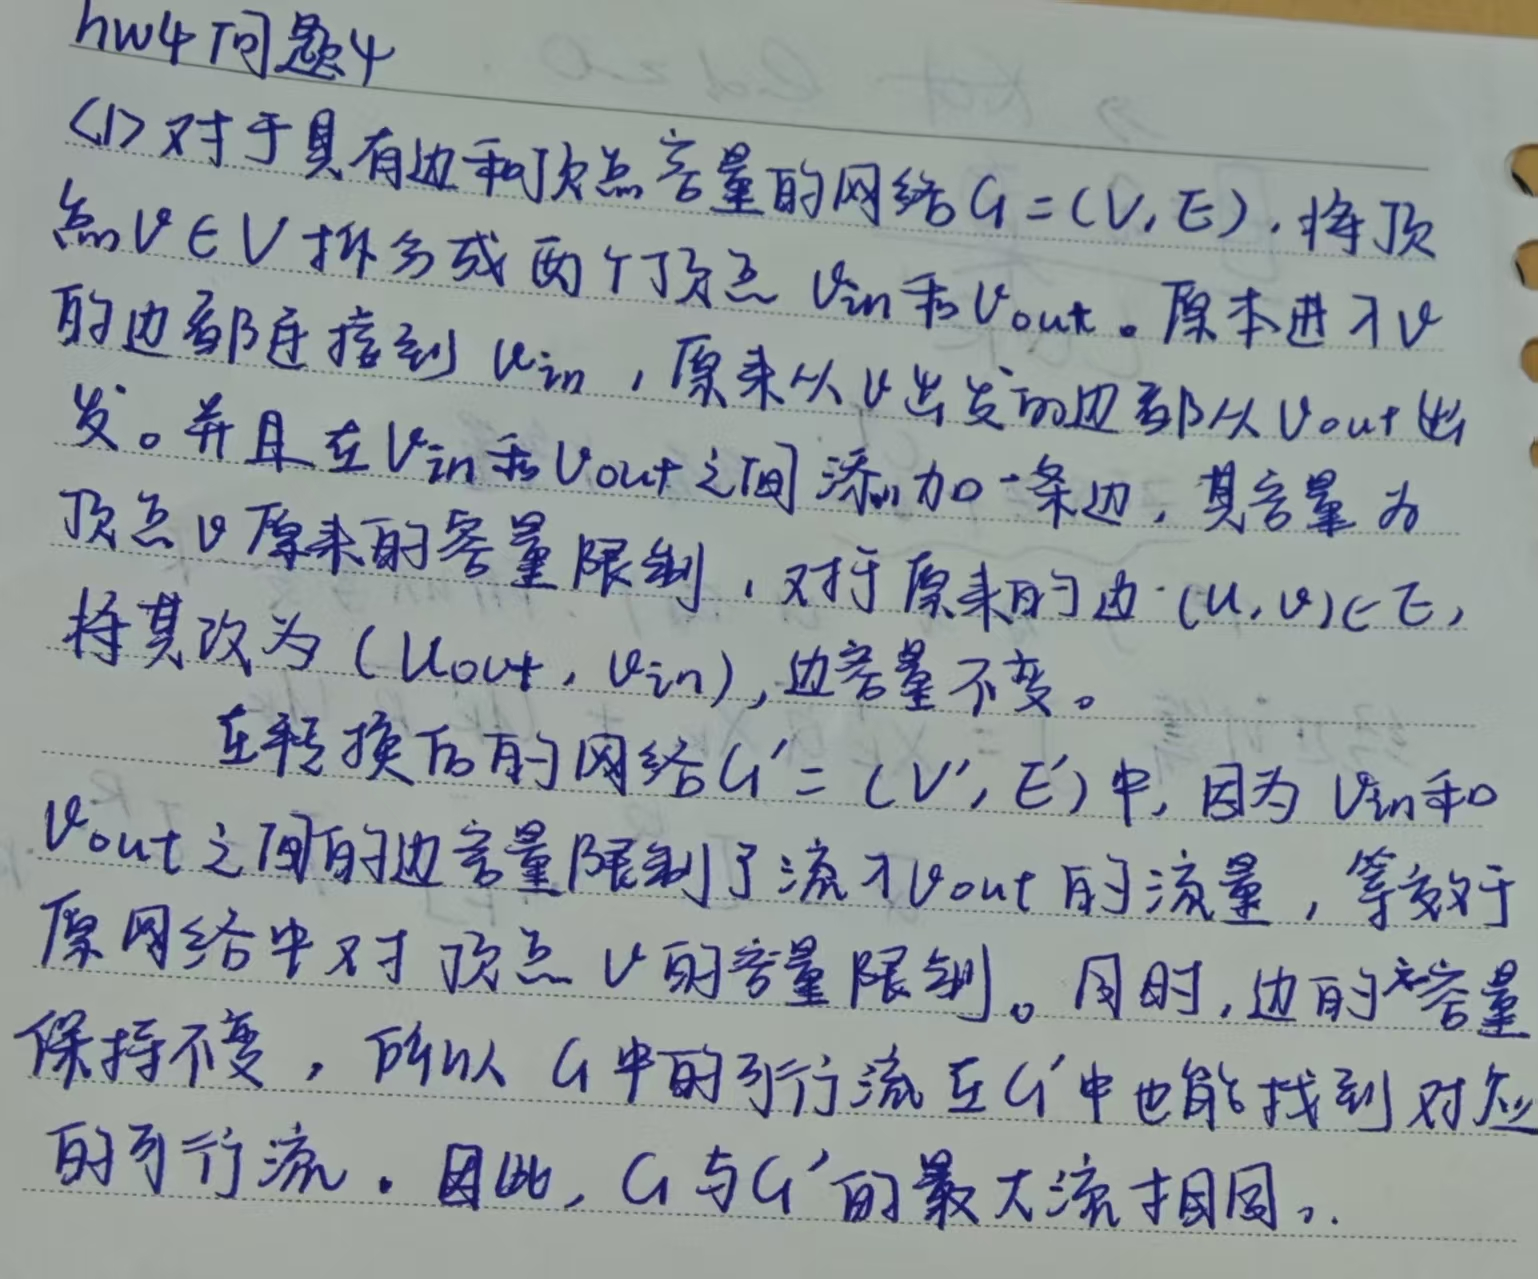

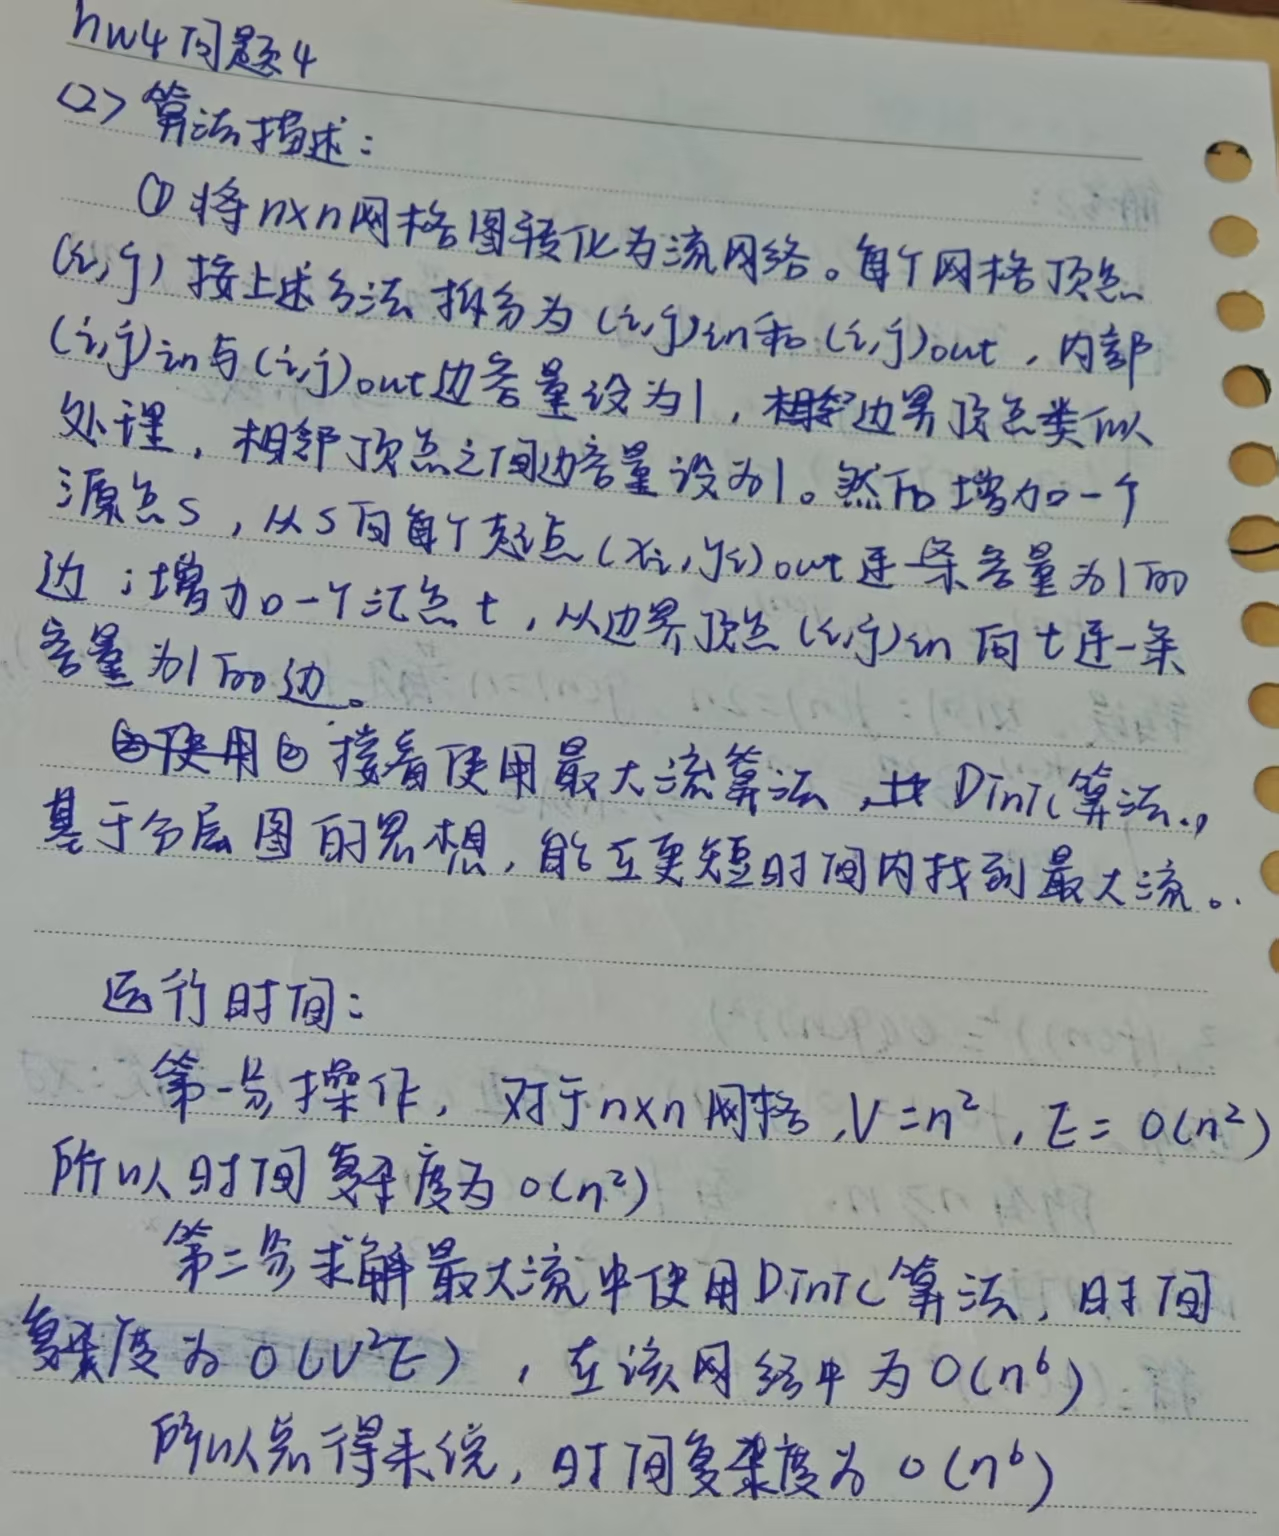


 
